In [2]:
%run "data-ingestion.ipynb"

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


         date  close  log_close
0  2007-04-02  14.08       2.64
1  2007-04-03  14.04       2.64
2  2007-04-04  14.14       2.65
3  2007-04-05  14.18       2.65
4  2007-04-09  14.40       2.67
            close  log_close
date                        
2007-04-02  14.08       2.64
2007-04-03  14.04       2.64
2007-04-04  14.14       2.65
2007-04-05  14.18       2.65
2007-04-09  14.40       2.67


In [3]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
import pmdarima as pm

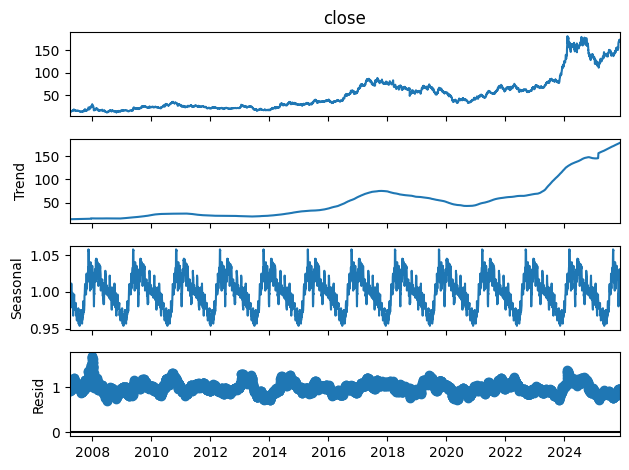

In [4]:
#Decomposition of TimeSeries models
def decomposition(df, period):
    decom = seasonal_decompose(df['close'], model="multiplicative", period= period, extrapolate_trend= 'freq')
    decom.plot()
    plt.show()

decomposition(stock_df, 365)

In [5]:
def acf_pacf(df, lags):
    var = df['close']
    fig = plot_acf(var, lags=lags)
    fig.set_size_inches((9,5))
    fig.tight_layout()
    plt.show()
    
    pfig = plot_pacf(var, lags=lags)
    pfig.set_size_inches((9,5))
    pfig.tight_layout()
    plt.show()

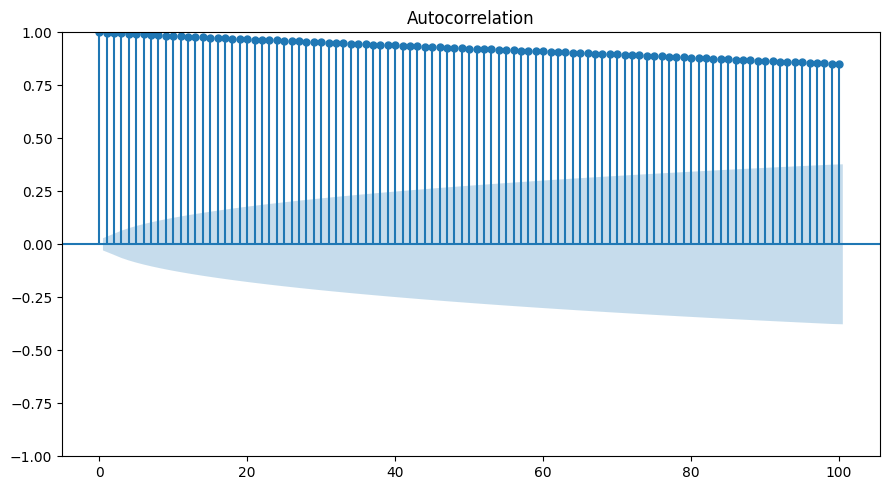

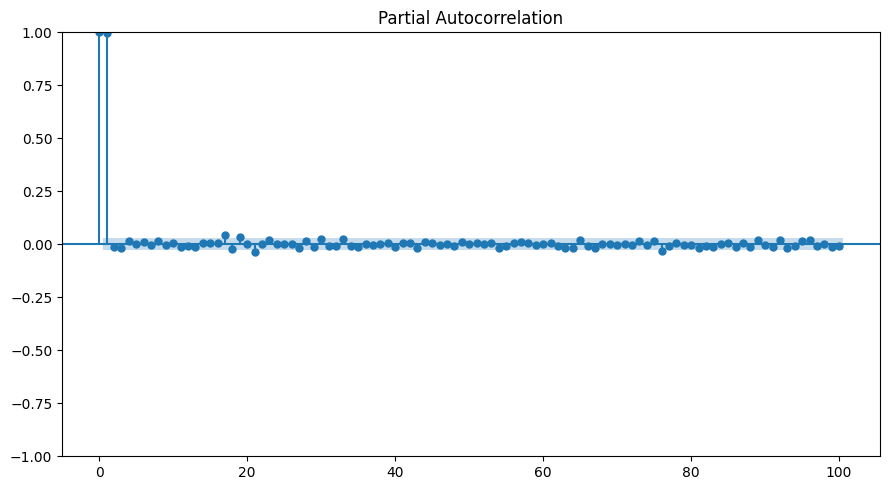

In [6]:
acf_pacf(stock_df, 100)

In [7]:
#Dicky fuller test
#H0: Non Stationary
#H1: Stationary

def adfuller_test(df):
    adfuller_result = adfuller(df['close'], autolag= 'AIC')
    adfuller_output = pd.Series(adfuller_result[:4], index=['Test statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    print(adfuller_output)

In [8]:
adfuller_test(stock_df)

Test statistic                    0.666023
p-value                           0.989135
Lags Used                        29.000000
Number of Observations Used    4568.000000
dtype: float64


In [9]:
# Degree of differencing
def degree_of_differencing(df):
    warnings.simplefilter(action = 'ignore', category = Warning)
    df_log = np.log(df['close'])
    iocl_ndiffs = pm.arima.ndiffs(df['close'], test = 'adf')
    print(f'The degree of differencing is {iocl_ndiffs}')

In [10]:
degree_of_differencing(stock_df)

The degree of differencing is 1
